## Linear Pipeline, Giessen-style synthetic data. 5 sensitive parameters.

In [2]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import Simulation Data and Conduct PCA

Import the input and output data. Here we also import the recorded boolean variables where input parameters lead to a failed output. 

In [7]:
# specify which dataset 
n_samples = 5000
n_params = 6

input_file = pd.read_csv(f"../Emulation/Input/input_{n_samples}_{n_params}params.csv")
output_file = pd.read_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/resampled_all_pressure_traces_rv.csv")


bool_exist = False
if bool_exist:
 boolean_index = pd.read_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/bool_indices_{n_samples}.csv")

In [8]:
output_file

,0,1,2,3,4,5,6,7,8,9,...,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR,CO
0,2.794266,2.183868,1.688265,1.294738,0.989281,0.757637,0.586133,0.462287,0.375189,0.315661,...,44.536902,26.156870,28.852617,0.412692,0.149962,0.018026,0.702685,0.721205,83.194043,3.254057
1,2.981238,2.357218,1.851316,1.450360,1.139872,0.905131,0.732028,0.607696,0.520896,0.462189,...,46.753853,26.966680,28.200192,0.423220,0.259315,0.013813,0.733764,0.553425,108.415774,4.063070
2,1.748728,1.425186,1.168354,0.968946,0.817573,0.705286,0.623957,0.566508,0.527013,0.500685,...,25.891641,17.671158,20.020500,0.317496,0.447044,0.010987,0.465192,0.448402,133.808630,3.836614
3,2.919265,2.310572,1.815756,1.422652,1.117651,0.886741,0.716361,0.594047,0.508836,0.451469,...,48.721991,24.697086,27.172229,0.493102,0.207944,0.022903,0.972783,0.881338,68.078328,3.457796
4,3.077761,2.412069,1.870053,1.438619,1.103093,0.848335,0.659675,0.523599,0.428206,0.363420,...,53.694212,26.766497,30.987869,0.501501,0.135667,0.020038,1.006023,0.769472,77.975507,3.561705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.759161,2.135637,1.630412,1.230060,0.919945,0.685268,0.511911,0.387042,0.299485,0.239870,...,50.373124,27.068864,32.037533,0.462633,0.078164,0.012611,0.860925,0.515123,116.476957,4.025682
4996,2.957483,2.288125,1.744434,1.312522,0.977093,0.722562,0.533977,0.397684,0.301743,0.236114,...,53.350675,28.546016,33.812614,0.464936,0.063610,0.014475,0.868936,0.578921,103.641009,3.791635
4997,2.294138,1.860484,1.508022,1.228068,1.010921,0.846601,0.725458,0.638622,0.578299,0.537902,...,30.446194,17.803693,19.414197,0.415241,0.364019,0.018030,0.710106,0.693948,86.461853,3.847015
4998,2.415620,1.927899,1.531321,1.216328,0.972139,0.787585,0.651808,0.554790,0.487698,0.443055,...,39.606602,19.670942,22.991201,0.503342,0.207610,0.023160,1.013457,0.874104,68.641720,3.453642


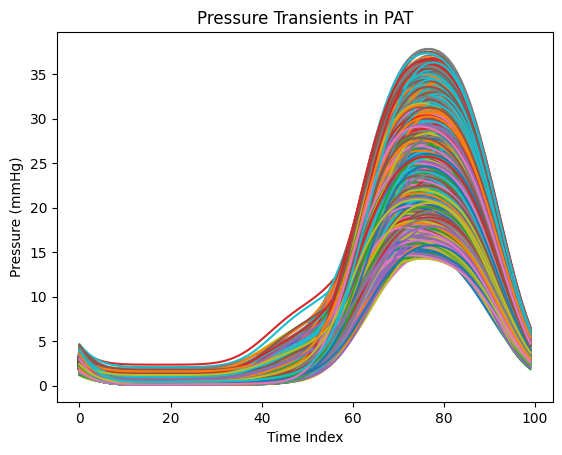

In [9]:
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(output_file)): 
    t = range(100) # Time adjustment
    p_pat = output_file.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in PAT')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

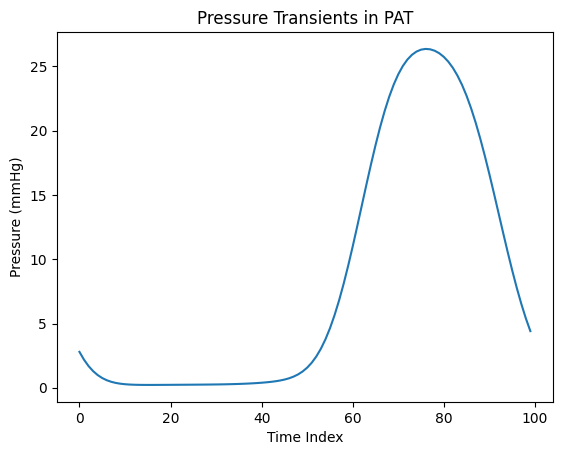

In [10]:
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(1): 
    t = range(100) # Time adjustment
    p_pat = output_file.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in PAT')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

In [11]:
# Clean the input data to remove failed to converge simulations
if bool_exist:
    cleaned_input_df = input_file.drop(boolean_index['0'].values)
   
else: 
    cleaned_input_df = input_file.copy()
    
cleaned_input_df.head()

,# pat.r,pat.c,rv.E_pas,rv.E_act,rv.k_pas,T,sas.r,sas.c,sas.l,sas.v_ref,...,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v
0,0.418681,5.439191,0.578021,1.623082,0.012798,0.713993,0.003,0.08,0.000062,0.0,...,0.064259,0.064259,0.321297,0.321297,0.910988,18.219767,233.440764,2.049724,61.937993,233.440764
1,0.304988,2.423713,0.766824,2.309340,0.021832,0.547891,0.003,0.08,0.000062,0.0,...,0.049310,0.049310,0.246551,0.246551,0.971652,19.433036,248.985769,2.186217,29.437558,248.985769
2,0.223507,4.749015,0.466143,0.709211,0.026501,0.443918,0.003,0.08,0.000062,0.0,...,0.039953,0.039953,0.199763,0.199763,0.924195,18.483894,236.824895,2.079438,54.862683,236.824895
3,0.342626,3.603849,0.864309,2.875094,0.018095,0.872524,0.003,0.08,0.000062,0.0,...,0.078527,0.078527,0.392636,0.392636,0.946973,18.939455,242.661772,2.130689,42.659339,242.661772
4,0.382917,3.938686,0.704185,3.263585,0.016139,0.761778,0.003,0.08,0.000062,0.0,...,0.068560,0.068560,0.342800,0.342800,0.940197,18.803947,240.925568,2.115444,46.289277,240.925568


In [12]:
boolean_index


NameError: name 'boolean_index' is not defined

### Compute PCA Data

In [ ]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

df = output_file.copy()

# Copy the data and separate the target variable (only pressure traces)
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.471530,-4.535047,-1.929673,0.121208,-0.336717,-0.239607,-0.000226,0.024580,-0.009474,0.014197
1,2.037412,-3.757237,-0.023503,0.196424,0.133804,0.005474,0.072056,-0.059396,-0.050546,-0.000502
2,-4.674405,10.133510,-2.169353,1.591592,-0.665399,-0.019859,-0.043307,-0.058737,0.056171,-0.000303
3,2.907187,-3.147212,2.807922,-0.274270,0.676127,0.155104,0.078515,-0.003475,0.039759,0.010031
4,0.723167,-7.499147,2.525855,-0.090325,1.011753,0.041206,0.033969,0.075460,0.036594,-0.001605


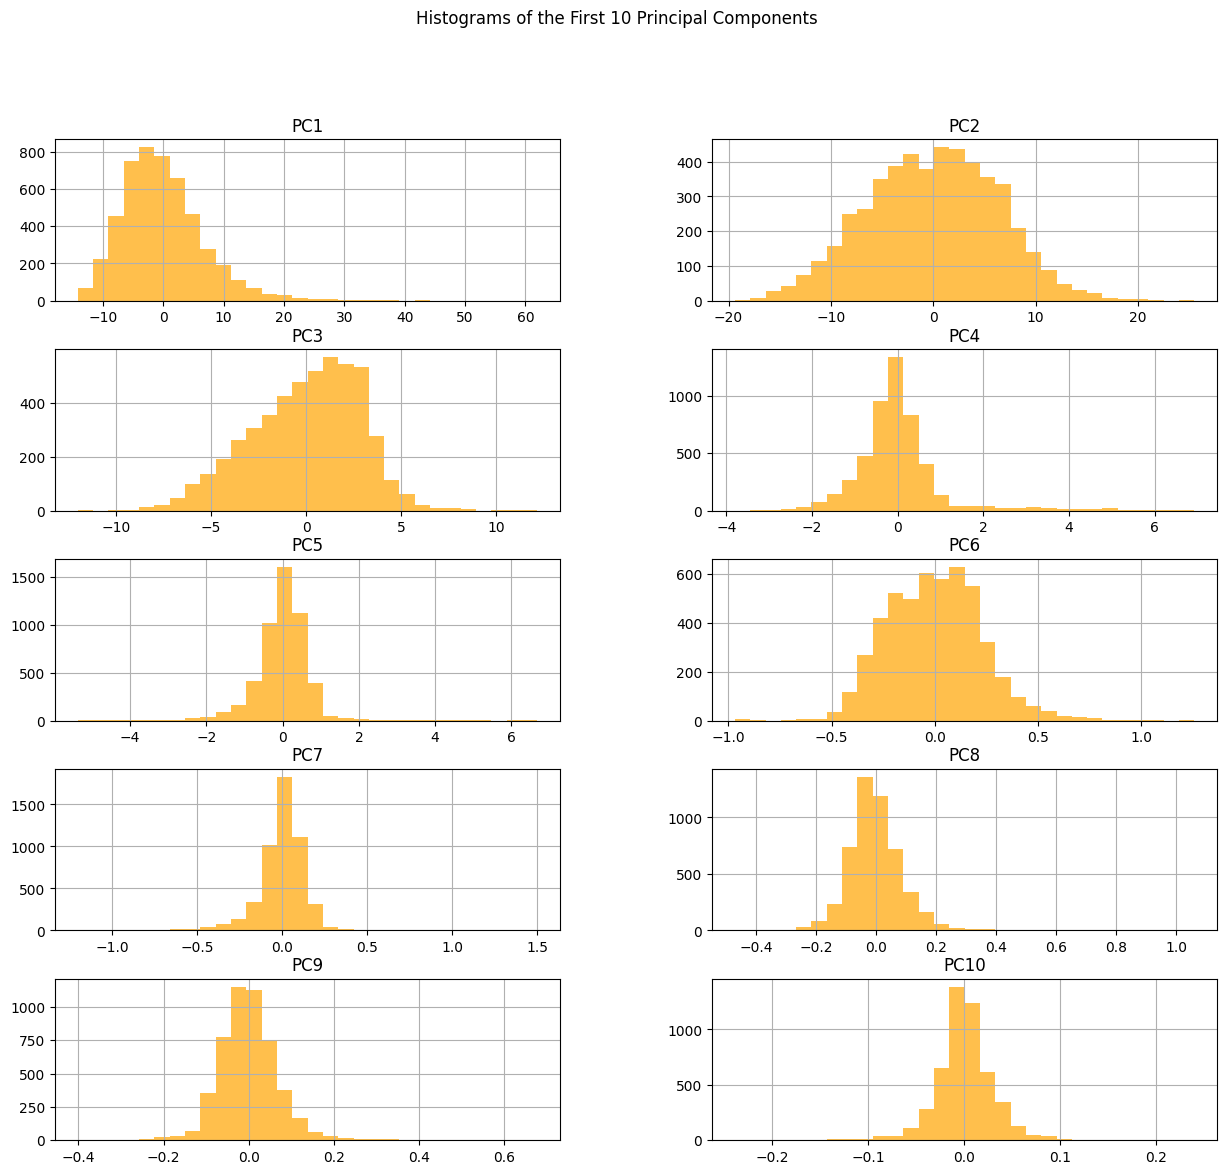

In [ ]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_32973/3676337090.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

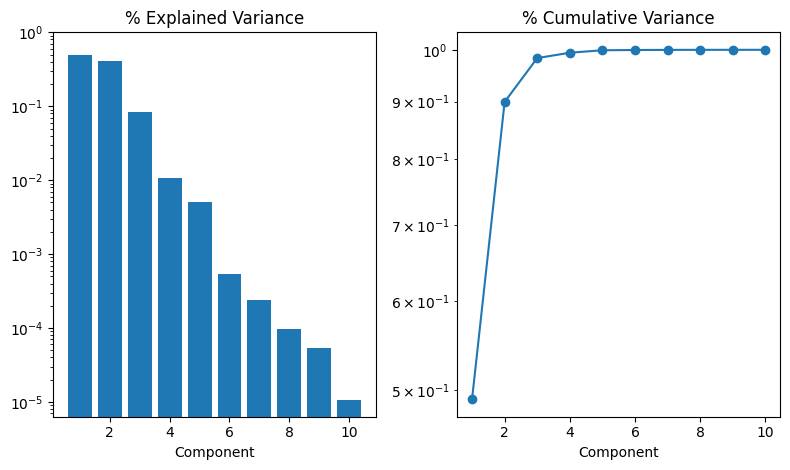

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    axs[0].bar(grid, explained_variance_ratio, log=True)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    axs[1].semilogy(grid, cumulative_explained_variance, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", 
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    fig.tight_layout()
    return axs

plot_variance(pca)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PowerTransformer


pipeline = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('post',   PowerTransformer())
            ])

signals_pca = pipeline.fit_transform(X_scaled)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(70, 15))

for i in range(signals_pca.shape[1]):
    temp = np.zeros(signals_pca.shape)
    temp[:, i] = signals_pca[:, i]
    
    signals_new = pipeline.inverse_transform(temp)
    
    ax[1][i].hist(signals_pca[:,i], bins=10)
    for signal in signals_new:
        ax[0][i].plot(signal)
        
plt.show()

NameError: name 'StandardScaler' is not defined

In [14]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

explained_variance_ratios = []
pca_components = []

for train_index, test_index in kf.split(X_scaled):
    X_train, _ = X_scaled[train_index], X_scaled[test_index]
    
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train)

    # Store the PCA components
    pca_components.append(pca.components_)
    # Store the explained variance ratio of this fold
    explained_variance_ratios.append(pca.explained_variance_ratio_)


explained_variance_ratios = np.array(explained_variance_ratios)

mean_explained_variance_ratio = np.mean(explained_variance_ratios, axis=0)
std_explained_variance_ratio = np.std(explained_variance_ratios, axis=0)

percentage_error = (std_explained_variance_ratio / mean_explained_variance_ratio) * 100
print(f'percentage error: \n{percentage_error}')
print(f'explained variance ratios: \n{explained_variance_ratios}')


NameError: name 'KFold' is not defined

### Save PCA Data

In [15]:
os.system(f'mkdir -p ../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA')

0

In [16]:
os.system(f'mkdir -p ../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA')

# Save first 3 Principle Component data
PC_list = []
for i in list(range(10)):

 PC = X_pca.iloc[:,i]
 PC.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/PCA/PC{i+1}.csv', index=False)
 PC_list.append(PC)




NameError: name 'X_pca' is not defined

In [17]:
PC_df = pd.DataFrame(PC_list).T
PC_df.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                 "PC6", "PC7", "PC8", "PC9", "PC10" ]
output = pd.concat([output_file, PC_df], axis=1)
output.to_csv(f"../Emulation/Outputs/Output_{n_samples}_{n_params}params/full_output.csv", index=False)
output

ValueError: Length mismatch: Expected axis has 0 elements, new values have 10 elements

### Train Linear Emulator

In [14]:
import contextlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:

# Select relevant inputs only
relevant_columns = []
for col in cleaned_input_df.columns:
    relevant_columns.append(col)
    if col == 'T': break

#columns_with_multiple_values = df_x.nunique() > 1
#filtered_input = df_x.loc[:, columns_with_multiple_values]

# Select only first 5 inputs 
filtered_input = cleaned_input_df[relevant_columns]
filtered_input

,# pat.r,pat.c,rv.E_pas,rv.E_act,rv.k_pas,T
0,0.418681,5.439191,0.578021,1.623082,0.012798,0.713993
1,0.304988,2.423713,0.766824,2.309340,0.021832,0.547891
2,0.223507,4.749015,0.466143,0.709211,0.026501,0.443918
3,0.342626,3.603849,0.864309,2.875094,0.018095,0.872524
4,0.382917,3.938686,0.704185,3.263585,0.016139,0.761778
...,...,...,...,...,...,...
4995,0.340473,3.538158,0.572102,3.038544,0.012162,0.509972
4996,0.387408,4.123019,0.412632,3.370887,0.013956,0.573132
4997,0.190797,3.219528,0.935772,1.291345,0.020469,0.687008
4998,0.269743,4.813311,0.637052,2.532827,0.025180,0.865363


In [16]:
def emulate_linear(input, output):
 # Input and output data
 X = input
 Y = output

 # Initialize the model
 model = LinearRegression()

 # Fit the model to the training data
 model.fit(X, Y)

 # Predict the output for the test data
 y_pred = model.predict(X)

 # Compute R² score for the predictions versus actual test data
 r2 = r2_score(Y, y_pred)

 # compute MSE
 mse = mean_squared_error(Y, y_pred)

# compute RSE
 n = len(Y)   # Number of observations
 p = X.shape[1] + 1  # Number of parameters (including intercept)
 rss = np.sum((Y - y_pred) ** 2)  # Residual Sum of Squares
 rse = np.sqrt(rss / (n - p))
 

 return model, r2, mse, rse

In [17]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
linear_rse_scores = {}
fitted_models = {}

# List of output keys to process
output_keys = output.columns


# Iterate through the output keys
for key in output_keys:
    model, r2, mse, rse = emulate_linear(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    linear_rse_scores[key] = rse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'RSE': linear_rse_scores, 'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models


# Save the DataFrame to a CSV file (models will not be saved in this step)
os.system(f'mkdir -p ../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators')
results_df.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}.csv')

# To save the DataFrame with models, use pickle
results_df.to_pickle(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}.csv')
results_df.to_pickle(f'/Users/pmzff/Documents/GitHub/GiessenDataAnalysis/Emulators/linear_models_and_r2_scores_{n_samples}.csv')
results_df


,R2_Score,MSE,RSE,Model
0,0.825621,0.052623,0.229557,LinearRegression()
1,0.822727,0.033945,0.184371,LinearRegression()
2,0.820936,0.022051,0.148599,LinearRegression()
3,0.818035,0.015070,0.122845,LinearRegression()
4,0.811044,0.011390,0.106797,LinearRegression()
...,...,...,...,...
PC6,0.411820,0.031381,0.177272,LinearRegression()
PC7,0.101682,0.021743,0.147559,LinearRegression()
PC8,0.178849,0.007949,0.089221,LinearRegression()
PC9,0.087115,0.004873,0.069859,LinearRegression()


In [18]:
results_df['R2_Score'].sort_values(ascending=False)

iT            1.000000
t_max_dpdt    0.994623
tau           0.993495
esp           0.975014
a_alpha       0.973072
                ...   
dia_ind       0.145911
PC7           0.101682
PC9           0.087115
PC10          0.026184
a_epad_ind    0.015043
Name: R2_Score, Length: 140, dtype: float64

### Calibrate Emulator 

In [ ]:
calibrate_output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
filtered_output = output[calibrate_output_keys]
filtered_output

In [ ]:
selected_rows = results_df.loc[calibrate_output_keys]
selected_rows


### Plot Observation 

In [ ]:
which_obs = 3

fig, ax = plt.subplots()

ind = which_obs

t = range(100) # Time adjustment
p_pat = output_file.iloc[ind, :100].values # Pressure transient

# Plot the pressure transient for each realization
ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Right Ventricle')

# Add legend to the plot
# ax.legend()
fig.set_size_inches(4,2)
# Display the plot
plt.show()

### Bayesian Calibration 

In [ ]:

# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)/5

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

### MSE of Bayes Calibration for Multiple Observations

In [ ]:
## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15


# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2




# Build beta matrix (d * p, where d is dimension of y_obs and p is dinemnsion of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

x_differences = []

for row in range(10):
 # Select observation and reshape to be (d, 1)
 Y_obs = np.array(filtered_output.T[row])
 Y_obs = Y_obs.reshape(len(Y_obs), 1)
 
 # Scale observation by intercepts of models
 Y_scaled = Y_obs - intercept
 
 # dynamically set T 
 t_mu = filtered_input['T'][row]
 t_sd = 0.0000001 #0.15**2
 mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
 Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
 Sigma_0 = np.diag(Sd)

 # Compute the posterior covariance
 Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
 Sigma_post = np.linalg.inv(Sigma_post_inv)

 # Cmpute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)

 # Compute squared-diff between true and calibrated x
 true = np.array(filtered_input.iloc[row].T)
 true = true.reshape(len(mu_0),1)
 diff = (Mu_post - true)**2 

 # Append arrary
 x_differences.append(diff)

# Compute MSE
bayes_mse_x = np.mean(np.hstack(x_differences), axis=1)

bayes_mse_x_df = pd.DataFrame(bayes_mse_x)
bayes_mse_x_df.columns = ['MSE']
bayes_mse_x_df.index = filtered_input.columns
#bayes_mse_x_df.to_csv('bayes_MSE_multi_output_x.csv')

bayes_mse_x_df

### Including model error and observation error

### Bayesian Calibration  
Assume we have the following linear regression model $$y = \beta X + \beta_0 + \epsilon_{model}, \epsilon_{model} \sim N_p(0, \sigma_{model}^2I)$$ 

Assume we also have the following observation model $$y_{obs} = y + \epsilon_{obs}, \epsilon_{obs} \sim N_p(0, \sigma_{obs}^2I)$$. 

The posterior distribution can be shown that $$\pi(X|y_{obs}) \sim N(\mu_{post}, \Sigma_{post})$$ where $$\mu_{post} = \Sigma_{post} \left( \beta^T \left( \sigma_{model}^2 + \sigma_{obs}^2\right)^{-1} y_{obs} + \Sigma_0^{-1}\mu_0\right)$$ and $$ \Sigma_{post} = \left( \beta^T( \sigma_{model}^2 + \sigma_{obs}^2)^{-1}\beta + \Sigma_0^{-1}\right)^{-1}$$


In [ ]:
# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)


# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05
obs_error = np.std(filtered_output)*obs_error_scale
epsilon_obs = np.diag(obs_error)

# total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []


for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)



In [ ]:
mu_0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()

plt.savefig("../Results/posterior__summarystats.png")
plt.show()


# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
# Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)
samples = rg.multivariate_normal(Mu_post.flatten(), Sigma_post, size=100)  # Generate 10 samples
samples_df = pd.DataFrame(samples)
samples_df.to_csv("../Results/posterior_sample_summarystats.csv", index=False)

### Calibrate on whole pressure waveform

In [ ]:
output_keys = output.iloc[:,0:101].columns
#output_keys = list(output.iloc[:, :100].columns) + ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt', 'A_p', 'P_max', 'esp', 'sys', 'EF', 'Ees/Ea']

In [ ]:
selected_rows = results_df.loc[output_keys]

filtered_output = output.loc[:, output_keys]


obs_error = np.max(np.std(filtered_output) * obs_error_scale)
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
epsilon_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix
epsilon_obs


In [ ]:
# Selects which observation to calibrate on
which_obs = 3

## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001 #0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)


# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05

# Take obs_error as 5% of sd of most varying parameter (max) so that all error is identical
obs_error = np.max(np.std(filtered_output) * obs_error_scale)
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
epsilon_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix


# total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []


for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()
posterior_stds = np.sqrt(np.diag(Sigma_post))  # Extract standard deviations

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] - 3 * prior_stds[i], posterior_means[i] - 3 * posterior_stds[i])
    x_max = max(prior_means[i] + 3 * prior_stds[i], posterior_means[i] + 3 * posterior_stds[i])
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs
    prior_pdf = norm.pdf(x, prior_means[i], prior_stds[i])
    posterior_pdf = norm.pdf(x, posterior_means[i], posterior_stds[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.savefig("../Results/posterior__waveform.png")
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
Dinv = np.diag(1 / np.sqrt(np.diag(Sigma_post))) 
corr = Dinv @ Sigma_post @ Dinv
corr

In [ ]:

# Feed calibrated x_hat back into linear model 
y_calibrated = (beta_matrix @ Mu_post) + intercept 

y_compare = np.hstack([Y_obs, y_calibrated])
y_compare = pd.DataFrame(y_compare)
y_compare.columns = ("y_true", "y_calibrated")
y_compare.shape


### Plotting posterior waveforms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load DataFrames
waveforms = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/waveform_resampled_all_pressure_traces_rv.csv")
bestem = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/bestem_resampled_all_pressure_traces_rv.csv")
waveplus = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/waveplus_resampled_all_pressure_traces_rv.csv")
pca = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/pca_resampled_all_pressure_traces_rv.csv")
summarystats = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/summarystats_resampled_all_pressure_traces_rv.csv")
pca_123 = pd.read_csv("../Results/500_5params/Posterior_Simulations/Resampled_Data/pca_123_resampled_all_pressure_traces_rv.csv")

datasets = {"Waveforms": waveforms, "Bestem": bestem, "WavePlus": waveplus, "PCA_all": pca, "PCA_123": pca_123, "SummaryStats": summarystats}


# Ground truth waveform
y_true = pd.Series(y_compare['y_true'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, (name, df) in enumerate(datasets.items()):
    ax = axes[i]  # Assign the correct axis
    sqe = (df.iloc[:, :101] - y_true.values) ** 2
    sse = sqe.mean(axis=0)
    sum_mse = sse.sum(axis=0)
    
    # Plot y_true
    ax.plot(y_true.values, label="True Waveform", color='c', linewidth=2)
    
    # Plot all waveforms in faded orange
    for j in range(100):
        ax.plot(df.iloc[j, :101].values, color='orange', alpha=0.1)
    
    # Compute and plot the mean waveform
    mean_waveform = df.iloc[:, :101].mean(axis=0)
    ax.plot(mean_waveform.values, color='darkorange', linewidth=2, label="Mean Calibrated Waveform")
    
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_xlabel("Time Index")
    ax.set_title(f"{name} (S_MSE = {sum_mse:.2f})")
    
axes[0].set_ylabel("Pressure (mmHg)")
axes[0].legend()

plt.suptitle("Calibrated Pressure Waveforms for Different Methods")
plt.tight_layout()
plt.show()


### Log input

In [ ]:
def emulate_linear_log(input, output):
 # Input and output data
 X = np.log(input)
 Y = output

 # Initialize the model
 model = LinearRegression()

 # Fit the model to the training data
 model.fit(X, Y)

 # Predict the output for the test data
 y_pred = model.predict(X)

 # Compute R² score for the predictions versus actual test data
 r2 = r2_score(Y, y_pred)

 # compute MSE
 mse = mean_squared_error(Y, y_pred)

# compute RSE
 n = len(Y)   # Number of observations
 p = X.shape[1] + 1  # Number of parameters (including intercept)
 rss = np.sum((Y - y_pred) ** 2)  # Residual Sum of Squares
 rse = np.sqrt(rss / (n - p))
 

 return model, r2, mse, rse

In [ ]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
linear_rse_scores = {}
fitted_models = {}

# List of output keys to process
#output_keys = ['CO', 'EF', 'mPAP', 'dPAP', 'sPAP', 'PC1', 'PC2', 'PC3', 'PC4']
output_keys = output.iloc[:,101:].columns
#output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
#               'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'PC1', 'PC2', 'PC3']

# Iterate through the output keys
for key in output_keys:
    model, r2, mse, rse = emulate_linear_log(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    linear_rse_scores[key] = rse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df_log = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'RSE': linear_rse_scores, 'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models
print(results_df_log)

# Save the DataFrame to a CSV file (models will not be saved in this step)
results_df_log.to_csv(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')

# To save the DataFrame with models, use pickle
results_df_log.to_pickle(f'../Emulation/Outputs/Output_{n_samples}_{n_params}params/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')
results_df_log.to_pickle(f'/Users/pmzff/Documents/GitHub/GiessenDataAnalysis/Emulators/linear_models_and_r2_scores_{n_samples}_log.csv')


In [ ]:
selected_rows = results_df_log.loc[calibrate_output_keys]
print(selected_rows.shape)


filtered_output = output.loc[:, calibrate_output_keys]
filtered_output.shape

In [ ]:
import numpy as np

# Select observation to calibrate on
which_obs = 3

## Define priors (convert to log-space)
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = filtered_input['T'][which_obs]

# Convert mean to log-space
mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
log_mu_0 = np.log(mu_0)

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.0000001  # Small variance for temperature

Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)

# Convert variance to log-space using delta method: Var[log(X)] ≈ Var[X] / X^2
Sigma_0_log = np.diag( (1 / mu_0.flatten())**2 ) @ Sigma_0 @ np.diag( (1 / mu_0.flatten())**2 )

# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05
obs_error = np.std(filtered_output) * obs_error_scale
epsilon_obs = np.diag(obs_error)

# Total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert lists to NumPy arrays
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept).reshape(len(intercept), 1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs]).reshape(-1, 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance (in log-space)
Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0_log)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Compute the posterior mean (in log-space)
Mu_post_log = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0_log) @ log_mu_0)

# Convert back from log-space to original space
Mu_post = np.exp(Mu_post_log + 0.5 * np.diag(Sigma_post).reshape(-1, 1))  # Mean of log-normal
Sigma_post_diag = np.exp(2 * Mu_post_log + np.diag(Sigma_post).reshape(-1, 1)) * (np.exp(np.diag(Sigma_post).reshape(-1, 1)) - 1)  # Variance of log-normal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm

# Convert (5,1) arrays to (5,) for proper indexing
prior_means = mu_0.flatten()
prior_stds = np.sqrt(np.diag(Sigma_0))  # Extract standard deviations

posterior_means = Mu_post.flatten()  # Log-normal mean (already transformed)
posterior_stds = np.sqrt(Sigma_post_diag).flatten()  # Log-normal std dev

# True values from filtered_input
true_values = filtered_input.iloc[which_obs].values

# Parameter names
param_names = ["c_svn", "r_pat", "c_pat", "rv_Eact", "T"]

# Create subplots for distributions
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, ax in enumerate(axes):
    # Prior transformation to log-normal
    prior_mean_log = np.log(prior_means[i])
    prior_std_log = prior_stds[i] / prior_means[i]  # Delta method approx
    
    # Convert normal mean & std to log-normal parameters
    prior_shape = np.sqrt(np.log(1 + (prior_std_log**2)))
    prior_scale = np.exp(prior_mean_log)

    # Define x-range based on prior and posterior means
    x_min = min(prior_means[i] / 3, posterior_means[i] / 3)  # Avoid negative values
    x_max = max(prior_means[i] * 3, posterior_means[i] * 3)
    x = np.linspace(x_min, x_max, 100)

    # Compute PDFs using log-normal distributions
    prior_pdf = lognorm.pdf(x, prior_shape, scale=prior_scale)
    posterior_pdf = lognorm.pdf(x, np.sqrt(np.log(1 + (posterior_stds[i]**2 / posterior_means[i]**2))), scale=posterior_means[i])

    # Plot prior and posterior distributions
    ax.plot(x, prior_pdf, label="Prior", linestyle="dashed", color="blue")
    ax.plot(x, posterior_pdf, label="Posterior", linestyle="solid", color="red")

    # Plot true value as a vertical line
    ax.axvline(true_values[i], color="green", linestyle="dotted", label="True Value")

    # Labels and title
    ax.set_title(param_names[i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

# ---- Plot Covariance Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Prior Covariance Matrix
sns.heatmap(Sigma_0, annot=True, fmt=".3f", cmap="RdBu", xticklabels=param_names, yticklabels=param_names, ax=axes[0])
axes[0].set_title("Prior Covariance Matrix")

# Plot Posterior Covariance Matrix
sns.heatmap(Sigma_post, annot=True, fmt=".4f", cmap="PiYG", xticklabels=param_names, yticklabels=param_names, ax=axes[1])
axes[1].set_title("Posterior Covariance Matrix")

plt.tight_layout()
plt.show()

In [ ]:
beta_matrix @ np.log(Mu_post_df) + intercept

In [ ]:

true_values = filtered_input.iloc[which_obs].values
Mu_post.flatten() - true_values
